<h3>Генератор равномерного распределения</h3>

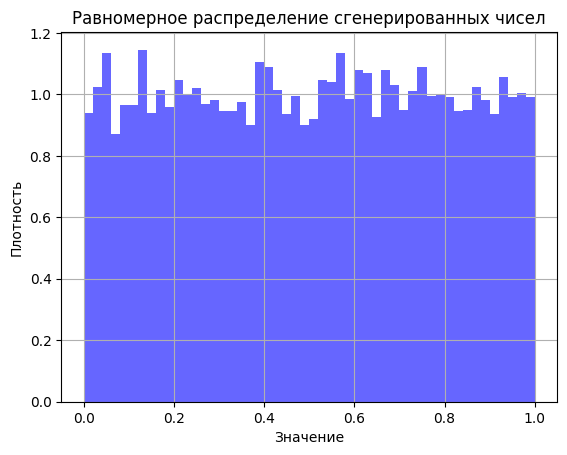

In [3]:
import matplotlib.pyplot as plt
from MersenneTwister import MersenneTwister

mt = MersenneTwister()
n = 10000

random_floats = [mt.genrand_float() for _ in range(n)]

plt.hist(random_floats, bins=50, density=True, alpha=0.6, color='b')
plt.title('Равномерное распределение сгенерированных чисел')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.grid(True)
plt.show()


<h3>Генератор других распределений</h3>

In [4]:
from DistributionSampler import DistributionSampler
import numpy as np

mt = MersenneTwister()
sampler = DistributionSampler(mt)

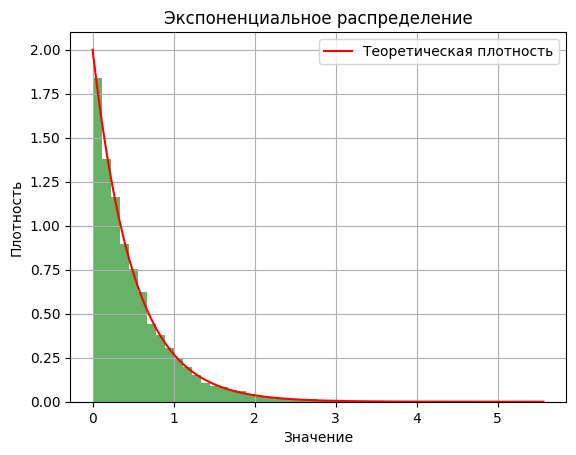

In [5]:
lambd = 2
exp_samples = [sampler.exponential(lambd) for _ in range(10000)]

plt.hist(exp_samples, bins=50, density=True, alpha=0.6, color='g')
x = np.linspace(0, max(exp_samples), 100)
plt.plot(x, lambd * np.exp(-lambd * x), 'r', label="Теоретическая плотность")
plt.legend()
plt.title("Экспоненциальное распределение")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.grid(True)
plt.show()

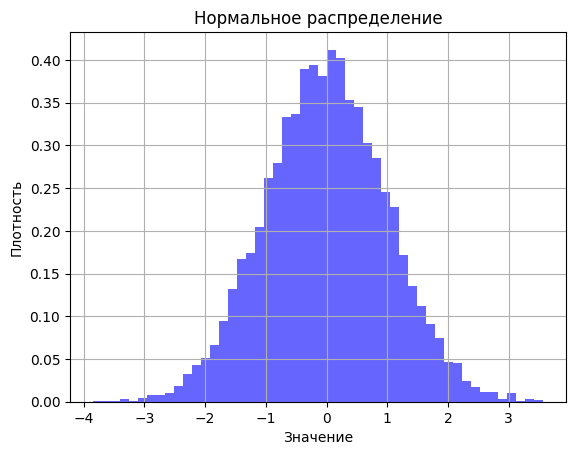

In [6]:
normal_samples = [sampler.normal() for _ in range(10000)]

plt.hist(normal_samples, bins=50, density=True, alpha=0.6, color='b')
x = np.linspace(-4, 4, 100)
plt.title("Нормальное распределение")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.grid(True)
plt.show()

<h2>Симуляция</h2>

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfinv
from collections import deque
import heapq
import random
from DistributionSampler import DistributionSampler
from MersenneTwister import MersenneTwister
from models.Library import Library
from models.Librarian import Librarian
from models.User import User

def simulate_library(num_books=3, copies_per_book=2, num_librarians=2, num_users=12, arrival_rate=1/5, librarian_mean=2, librarian_std=0.5, user_mean=30, user_std=5):
    generator = MersenneTwister()
    sampler = DistributionSampler(generator)
    library = Library(num_books=num_books, copies_per_book=copies_per_book, num_librarians=num_librarians, generator=generator, normal_mean_librarian=librarian_mean, normal_std_librarian=librarian_std)
    users = [User(i, generator, normal_mean=user_mean, normal_std=user_std) for i in range(num_users)]
    events = []
    current_time = 0

    for user in users:
        book_name = f"Book_{random.randint(0, num_books - 1)}"
        current_time += sampler.exponential(arrival_rate)
        event_time, success = library.request_book(user, book_name, current_time)
        if success:
            reading_time = user.decide_reading_time()
            heapq.heappush(events, (event_time + reading_time, user, book_name))
    
    while events:
        event_time, user, book_name = heapq.heappop(events)
        new_time, next_user = library.return_book(user, book_name, event_time)
        if next_user:
            reading_time = next_user.decide_reading_time()
            heapq.heappush(events, (new_time + reading_time, next_user, book_name))
    
    avg_wait_time = sum(library.wait_times) / len(library.wait_times)
    avg_librarian_workload = sum(l.total_service_time for l in library.librarians) / len(library.librarians)

    return avg_wait_time, library.served_users, avg_librarian_workload, current_time

avg_wait_time, served_users, avg_librarian_workload, overall_simulation_time = simulate_library(1, 1, 1, 10, 1/2, 2, 0.5, 30, 5)

print(f"Среднее время ожидания: {avg_wait_time:.2f} минут")
print(f"Количество обслуженных клиентов за минуту: {overall_simulation_time / served_users}")
print(f"Среднее время работы библиотекарей: {avg_librarian_workload:.2f} минут")

Среднее время ожидания: 139.02 минут
Количество обслуженных клиентов за минуту: 2.7614895783242437
Среднее время работы библиотекарей: 42.28 минут


In [2]:
import time

start_time = time.time()
N = 1_000_000
results = []

params = {
    'num_books': 5,
    'copies_per_book': 3,
    'num_librarians': 3,
    'num_users': 20,
    'arrival_rate': 1/4,  # Среднее время прибытия пользователей
    'librarian_mean': 2,  # Среднее время обслуживания пользователем
    'librarian_std': 0.5,  # Стандартное отклонение для времени обслуживания библиотекарем
    'user_mean': 30,  # Среднее время чтения пользователем
    'user_std': 5  # Стандартное отклонение для времени чтения
}

for i in range(N):
    avg_wait_time, served_users, avg_librarian_workload, overall_simulation_time = simulate_library(**params)
    results.append((avg_wait_time, served_users, avg_librarian_workload, overall_simulation_time))
    if (i % 10000 == 0):
        print(i)

end_time = time.time()
print(f"Total runtime: {end_time - start_time:.2f} seconds")


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
Total runtime: 2.08 seconds


<h2>Графики</h2>

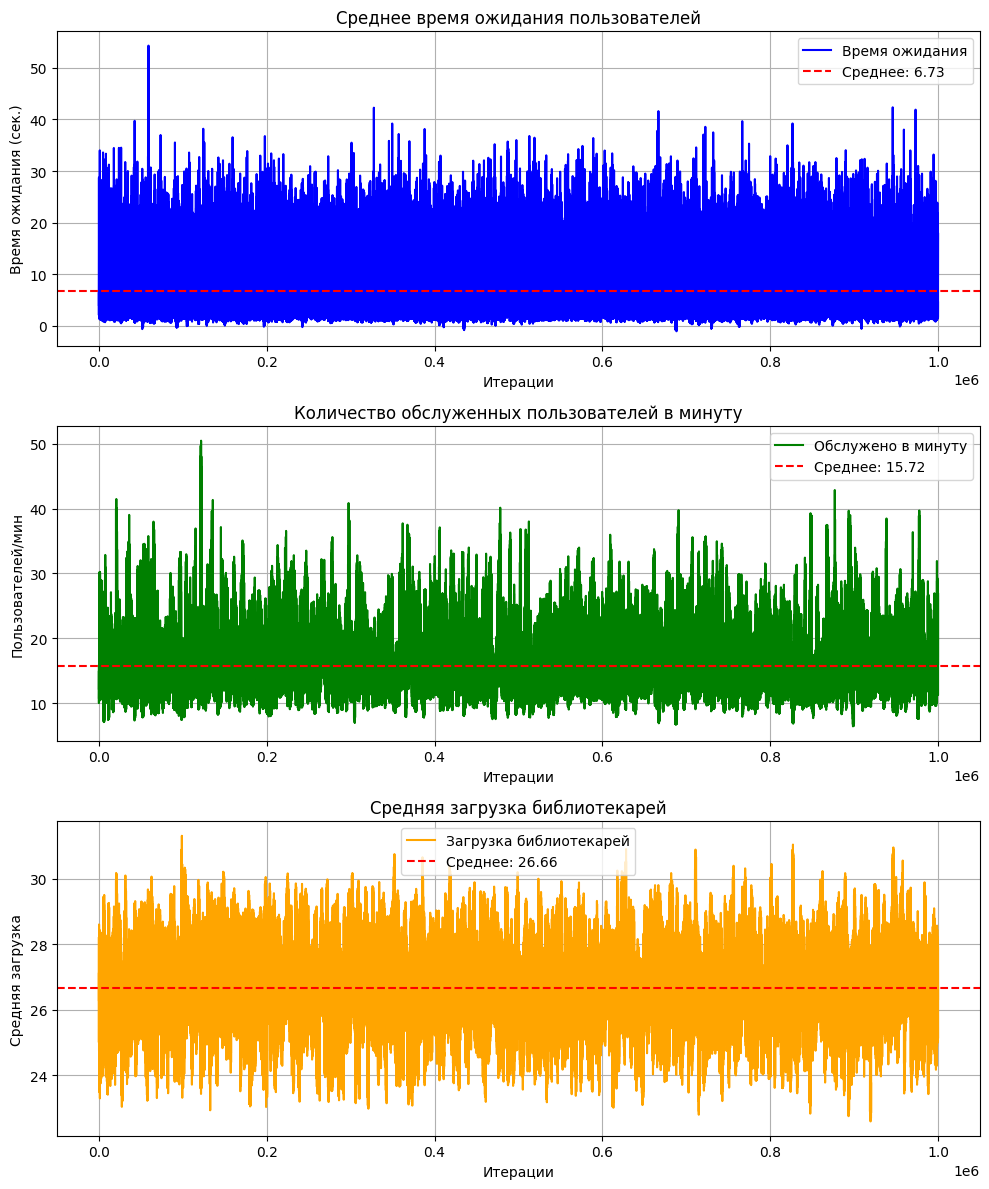

In [7]:
avg_wait_times = [result[0] for result in results]
served_users = [result[1] for result in results]
avg_librarian_workloads = [result[2] for result in results]
overall_sim_times = [result[3] for result in results]

served_users_per_minute = [users / (sim_time / 60) for users, sim_time in zip(served_users, overall_sim_times)]

mean_wait_time = np.mean(avg_wait_times)
mean_served_per_minute = np.mean(served_users_per_minute)
mean_librarian_workload = np.mean(avg_librarian_workloads)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))


axes[0].plot(avg_wait_times, color='blue', label="Время ожидания")
axes[0].axhline(mean_wait_time, color='red', linestyle="--", label=f"Среднее: {mean_wait_time:.2f}")
axes[0].set_title('Среднее время ожидания пользователей')
axes[0].set_xlabel('Итерации')
axes[0].set_ylabel('Время ожидания (сек.)')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(served_users_per_minute, color='green', label="Обслужено в минуту")
axes[1].axhline(mean_served_per_minute, color='red', linestyle="--", label=f"Среднее: {mean_served_per_minute:.2f}")
axes[1].set_title('Количество обслуженных пользователей в минуту')
axes[1].set_xlabel('Итерации')
axes[1].set_ylabel('Пользователей/мин')
axes[1].grid(True)
axes[1].legend()

axes[2].plot(avg_librarian_workloads, color='orange', label="Загрузка библиотекарей")
axes[2].axhline(mean_librarian_workload, color='red', linestyle="--", label=f"Среднее: {mean_librarian_workload:.2f}")
axes[2].set_title('Средняя загрузка библиотекарей')
axes[2].set_xlabel('Итерации')
axes[2].set_ylabel('Средняя загрузка')
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
plt.show()

<h3>Проведём серию экспериментов с разными входными данными</h3>

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import random

num_books_range = range(1, 31)
copies_per_book_range = range(1, 6)
num_librarians_range = range(1, 11)
num_users_range = range(10, 51, 10)
arrival_rate_range = [1/10, 1/5, 1/2]
librarian_mean_range = range(2, 6)
user_mean_range = range(20, 61, 10)

librarian_std = 0.5
user_std = 5

results = []

for num_books in num_books_range:
    print(f"{num_books} from 30")
    for copies_per_book in copies_per_book_range:
        for num_librarians in num_librarians_range:
            for num_users in num_users_range:
                for arrival_rate in arrival_rate_range:
                    for librarian_mean in librarian_mean_range:   
                        for user_mean in user_mean_range:
                            params = {
                                'num_books': num_books,
                                'copies_per_book': copies_per_book,
                                'num_librarians': num_librarians,
                                'num_users': num_users,
                                'arrival_rate': arrival_rate,
                                'librarian_mean': librarian_mean,
                                'librarian_std': librarian_std,
                                'user_mean': user_mean,
                                'user_std': user_std
                            }
                            avg_wait_time, served_users, avg_librarian_workload, overall_simulation_time = simulate_library(**params)
                            
                            results.append({
                                **params,
                                'avg_wait_time': avg_wait_time,
                                'served_users': served_users,
                                'avg_librarian_workload': avg_librarian_workload,
                                'overall_simulation_time': overall_simulation_time,
                                'clients_per_minute': overall_simulation_time / served_users if served_users > 0 else 0
                            })

df = pd.DataFrame(results)
df.to_csv("simulation_results.csv", index=False)

1 from 30
2 from 30
3 from 30
4 from 30
5 from 30
6 from 30
7 from 30
8 from 30
9 from 30
10 from 30
11 from 30
12 from 30
13 from 30
14 from 30
15 from 30
16 from 30
17 from 30
18 from 30
19 from 30
20 from 30
21 from 30
22 from 30
23 from 30
24 from 30
25 from 30
26 from 30
27 from 30
28 from 30
29 from 30
30 from 30


<h3>Построим графики</h3>

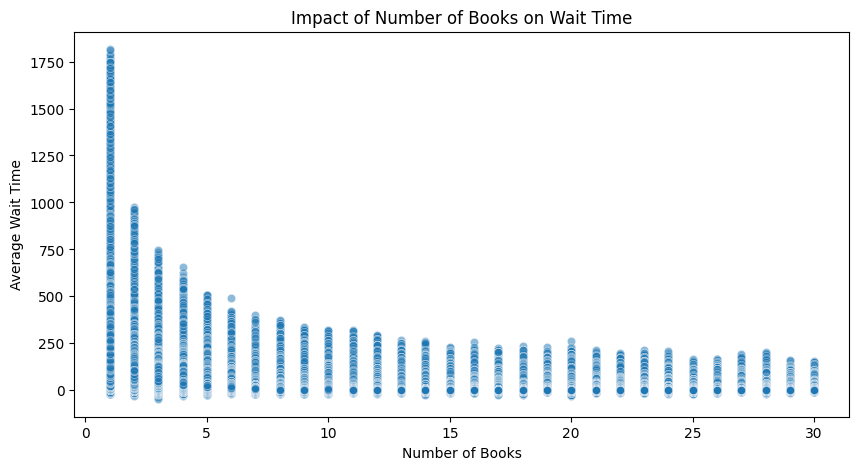

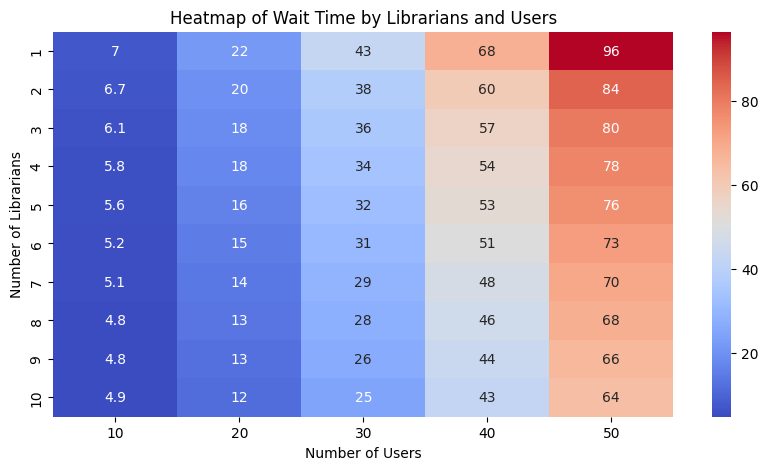

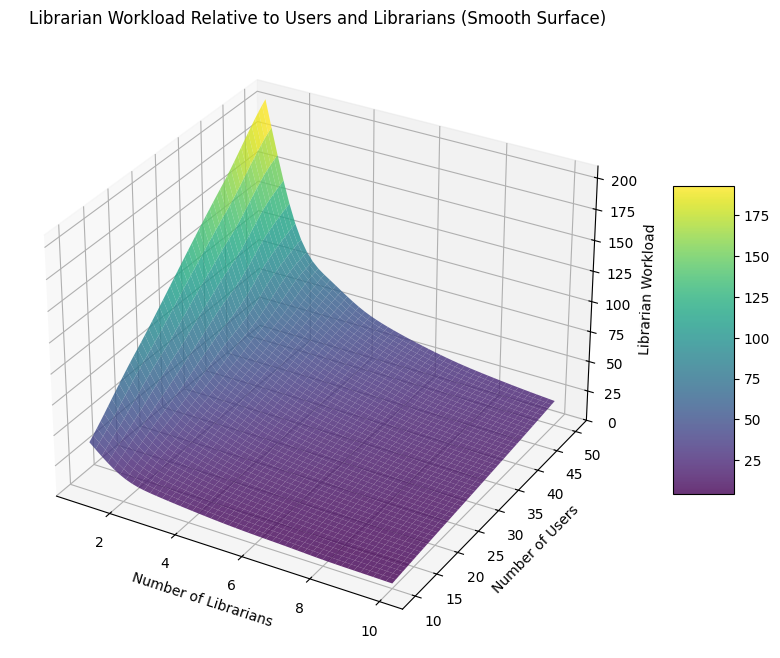

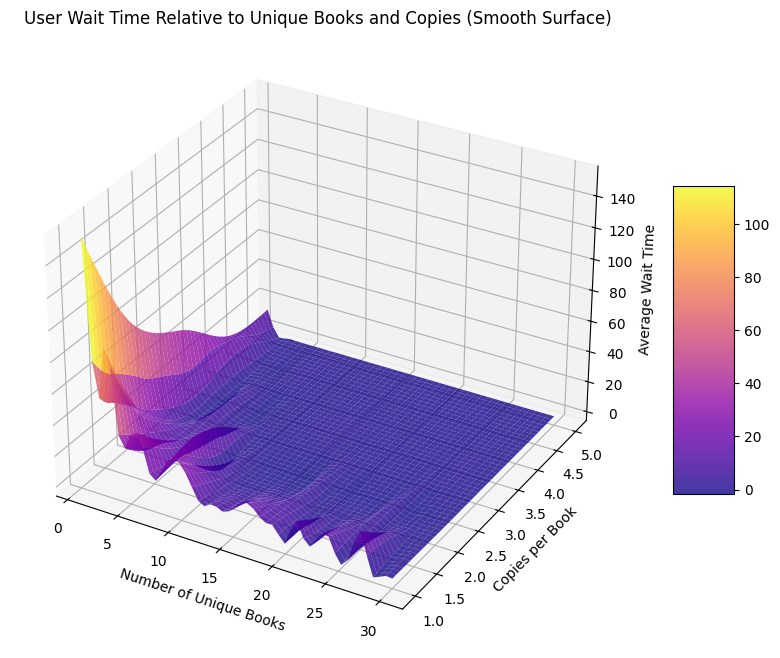

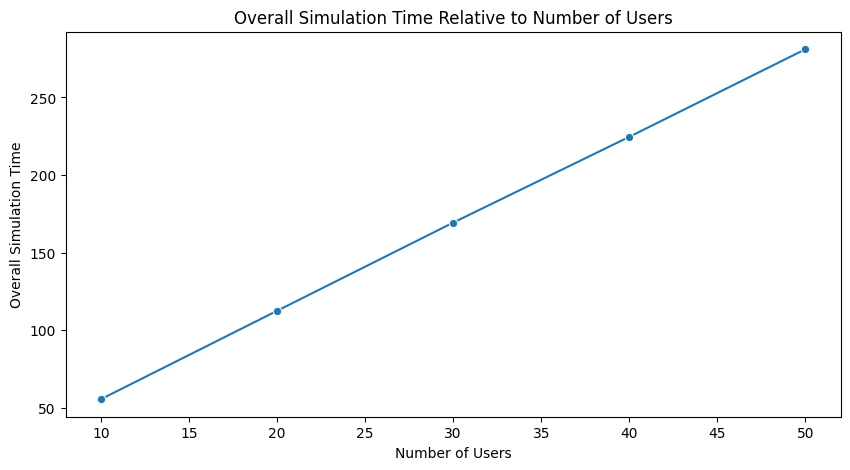

In [116]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['num_books'], y=df['avg_wait_time'], alpha=0.5)
plt.xlabel("Number of Books")
plt.ylabel("Average Wait Time")
plt.title("Impact of Number of Books on Wait Time")
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(df.pivot_table(values='avg_wait_time', index='num_librarians', columns='num_users'), cmap='coolwarm', annot=True)
plt.xlabel("Number of Users")
plt.ylabel("Number of Librarians")
plt.title("Heatmap of Wait Time by Librarians and Users")
plt.show()


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


xi = np.linspace(df['num_librarians'].min(), df['num_librarians'].max(), 50)
yi = np.linspace(df['num_users'].min(), df['num_users'].max(), 50)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((df['num_librarians'], df['num_users']), df['avg_librarian_workload'], (xi, yi), method='cubic')


surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_xlabel("Number of Librarians")
ax.set_ylabel("Number of Users")
ax.set_zlabel("Librarian Workload")
ax.set_title("Librarian Workload Relative to Users and Librarians (Smooth Surface)")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


xi = np.linspace(df['num_books'].min(), df['num_books'].max(), 50)
yi = np.linspace(df['copies_per_book'].min(), df['copies_per_book'].max(), 50)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((df['num_books'], df['copies_per_book']), df['avg_wait_time'], (xi, yi), method='cubic')


surf = ax.plot_surface(xi, yi, zi, cmap='plasma', edgecolor='none', alpha=0.8)
ax.set_xlabel("Number of Unique Books")
ax.set_ylabel("Copies per Book")
ax.set_zlabel("Average Wait Time")
ax.set_title("User Wait Time Relative to Unique Books and Copies (Smooth Surface)")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()


plt.figure(figsize=(10, 5))
sns.lineplot(x=df['num_users'], y=df['overall_simulation_time'], marker='o', errorbar=None)
plt.xlabel("Number of Users")
plt.ylabel("Overall Simulation Time")
plt.title("Overall Simulation Time Relative to Number of Users")
plt.show()

<h3>Теперь промоделируем какую-то библиотеку и найдём характеристики</h3>

In [121]:
import pandas as pd
import numpy as np
import random
import scipy.stats as stats

num_books = 15
copies_per_book = 3
num_librarians = 5
librarian_mean = 3
librarian_std = 0.5
user_mean = 40
user_std = 5

num_users_range = range(10, 50)
arrival_rate_range = [1/10, 1/5, 1/2]

results = []

for _ in range(100000):
    num_users = random.choice(num_users_range)
    arrival_rate = random.choice(arrival_rate_range)

    params = {
        'num_books': num_books,
        'copies_per_book': copies_per_book,
        'num_librarians': num_librarians,
        'num_users': num_users,
        'arrival_rate': arrival_rate,
        'librarian_mean': librarian_mean,
        'librarian_std': librarian_std,
        'user_mean': user_mean,
        'user_std': user_std
    }

    avg_wait_time, served_users, avg_librarian_workload, overall_simulation_time = simulate_library(**params)

    results.append({
        **params,
        'avg_wait_time': avg_wait_time,
        'served_users': served_users,
        'avg_librarian_workload': avg_librarian_workload,
        'overall_simulation_time': overall_simulation_time,
        'clients_per_minute': overall_simulation_time / served_users if served_users > 0 else 0
    })

dflibrary = pd.DataFrame(results)

stats_summary = dflibrary[['avg_wait_time', 'served_users', 'avg_librarian_workload', 'overall_simulation_time']].describe()
variance_summary = dflibrary[['avg_wait_time', 'served_users', 'avg_librarian_workload', 'overall_simulation_time']].var()

def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)
    margin = sem * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean, mean - margin, mean + margin

ci_avg_wait_time = confidence_interval(dflibrary['avg_wait_time'])
ci_served_users = confidence_interval(dflibrary['served_users'])
ci_avg_librarian_workload = confidence_interval(dflibrary['avg_librarian_workload'])
ci_overall_simulation_time = confidence_interval(dflibrary['overall_simulation_time'])

print("Основные статистические характеристики:\n", stats_summary)
print("\nДисперсия:\n", variance_summary)
print("\nДоверительные интервалы:")
print(f"Среднее время ожидания: {ci_avg_wait_time}")
print(f"Обслуженные пользователи: {ci_served_users}")
print(f"Загрузка библиотекарей: {ci_avg_librarian_workload}")
print(f"Общее время симуляции: {ci_overall_simulation_time}")

dflibrary.to_csv("specific_library_simulation_results.csv", index=False)

Основные статистические характеристики:
        avg_wait_time   served_users  avg_librarian_workload  \
count  100000.000000  100000.000000           100000.000000   
mean        4.440234      29.491120               35.338278   
std         6.656983      11.554727               13.845836   
min       -10.917455      10.000000               10.501077   
25%         0.000000      19.000000               23.348248   
50%         1.848738      30.000000               35.345187   
75%         6.160478      39.000000               47.282965   
max        69.518900      49.000000               61.345525   

       overall_simulation_time  
count            100000.000000  
mean                164.627649  
std                 125.238859  
min                   8.359372  
25%                  67.496821  
50%                 124.801855  
75%                 228.511483  
max                 741.596823  

Дисперсия:
 avg_wait_time                 44.315428
served_users                 133.511716
a

<h3>Используем корреляционный анализ для определения чувствительности параметров</h3>

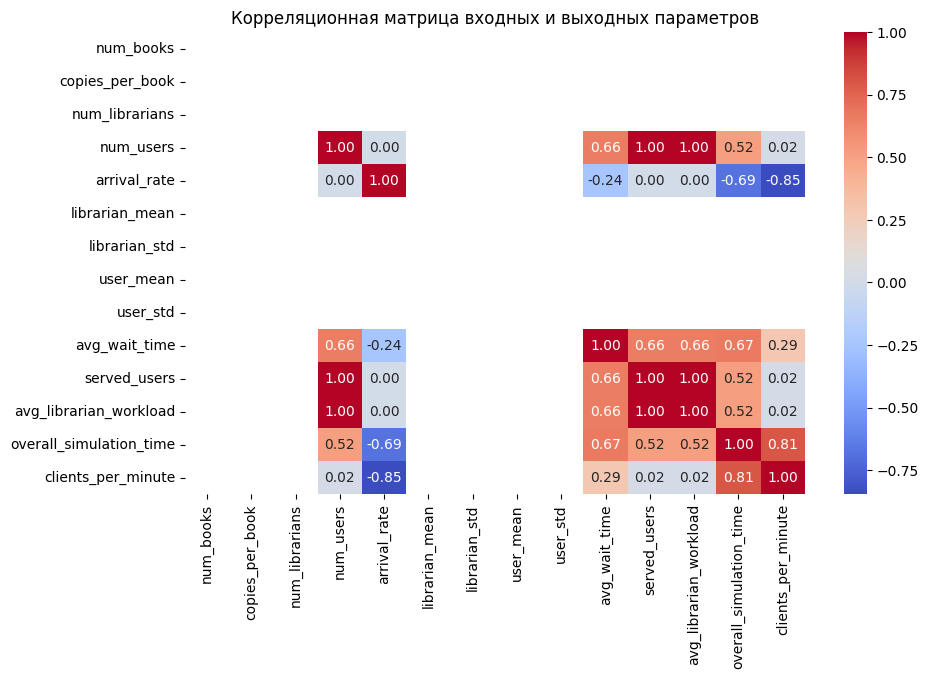

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица входных и выходных параметров")
plt.show()
